In [4]:
import json
from twython import Twython
import pandas as pd
import numpy as np


# Enter your keys/secrets as strings in the following fields
#credentials = {}
#credentials['CONSUMER_KEY'] = ''
#credentials['CONSUMER_SECRET'] = ''
#credentials['ACCESS_TOKEN'] = '-'
#credentials['ACCESS_SECRET'] = ''

# Save the credentials object to file
#with open("twitter_credentials.json", "w") as file:
#    json.dump(credentials, file)
    
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file) 
    
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])    

## look for key word

In [ ]:
query = {'q': 'energy',
        'result_type': 'recent',  # other options 'mixed','popular','recent'
        'count': 10,   # max 100
         # 'until':"2019-02-01",
         'geocode': '51.51753,-0.11214,1000mi'
        }

dict_ = {'user': [],
         'date': [],
         'text': [],
         'favorite_count': [],
         'retweet_count': [],
         'user_loc': [],
         'followers_count': [],
         'lang': [],
         'user_desc': [],
         'hashtags': [],
         'user_verified': [],
         'geo': [],
         'coordinates':[],
         'place':[],
         #'user_loc_country':[]
         
        }


for status in python_tweets.search(**query)['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])
    dict_['user_loc'].append( status['user']['location'])
    dict_['followers_count'].append(status['user']['followers_count'])
    dict_['lang'].append(status['lang'])
    dict_['user_desc'].append(status['user']['description'])
    dict_['user_verified'].append(status['user']['verified'])
    dict_['hashtags'].append(status['entities']['hashtags'])
    dict_['retweet_count'].append(status['retweet_count'])
    dict_['geo'].append(status['geo'])
    dict_['coordinates'].append(status['coordinates'])
    dict_['place'].append(status['place'])
    #dict_['user_loc_country'].append(status['user']['derived']['locations']['country'])
    
df = pd.DataFrame(dict_)
#dict_['text'][0]
df

In [ ]:
df.shape

In [ ]:
df

In [ ]:
#cities = pd.read_csv('list_cities.csv',sep=';')

## Translate queries and Tweets

In [5]:
from os import environ

from google.cloud import translate

def gtrans(text,dest='en'):
    
    '''this function represents the google translate API. use wisely!
    its expensive (20$/1mio characters, makes only 5000 tweets)'''
    
    
    project_id = 'lewagon-bootcamp-timwolfram' #environ.get("PROJECT_ID", "")

    parent = f"projects/{project_id}"
    client = translate.TranslationServiceClient()


    sample_text = text
    target_language_code = dest

    response = client.translate_text(
        contents=[sample_text],
        target_language_code=target_language_code,
        parent=parent,
    )

    for translation in response.translations:
        output_trans = translation.translated_text
        
    return output_trans

In [ ]:
gtrans('Hallo Welt')

In [6]:
dict_ = {'user': [],
             'date': [],
             'text': [],
             'text_en': [],
             'favorite_count': [],
             'retweet_count': [],
             'user_loc': [],
             'followers_count': [],
             'lang': [],
             'user_desc': [],
             'user_desc_en': [],
             'hashtags': [],
             'user_verified': [],

             #'geo': [],
             #'coordinates':[],
             #'place':[]

             #'user_loc_country':[]

            }



query_word = 'energy'

lang_list = ['en','de','fr','el','it','es',
                'pl', 'ro', 'nl', 'hu','pt',
                'sv',  'cs', 'bg', 'sk', 'da',
                'fi', 'hr', 'lt'
            ]

count_tweets = 1
result_type = 'mixed'

for lang in lang_list:
    
    query_word = gtrans(query_word, dest=lang)
    if lang == 'en':
        query = {'q': query_word,
            'result_type': result_type,  # other options 'mixed','popular','recent'
            'count': count_tweets,   # max 100
            'geocode': '51.51753,-0.11214,1000mi'
            }
        
    elif lang == 'fr':
        query = {'q': query_word,
            'result_type': result_type,  # other options 'mixed','popular','recent'
            'count': count_tweets,   # max 100
            'geocode': '47.22283,2.07099,1000mi'
            }
    elif lang == 'es':
        query = {'q': query_word,
            'result_type': result_type,  # other options 'mixed','popular','recent'
            'count': count_tweets,   # max 100
            'geocode': ' 40.42955,-3.67930,1000mi'
            }
        
    elif lang == 'pt':
        query = {'q': query_word,
            'result_type': result_type,  # other options 'mixed','popular','recent'
            'count': count_tweets,   # max 100
            'geocode': '39.82059,-7.49342,1000mi'
            }
        
    else:
        query = {'q': query_word,
            'result_type': result_type,  # other options 'mixed','popular','recent'
            'count': count_tweets,   # max 100
             # 'until':"2019-02-01",
             #'geocode': '50.0598058,14.3255426,1000km'
            }

   
    for status in python_tweets.search(**query)['statuses']:
        
        dict_['user'].append(status['user']['screen_name'])
        dict_['date'].append(status['created_at'])
        dict_['text'].append(status['text'])
        dict_['text_en'].append(gtrans(str(status['text']), dest='en'))#src=str(status['lang'])
        dict_['favorite_count'].append(status['favorite_count'])
        dict_['user_loc'].append( status['user']['location'])
        dict_['followers_count'].append(status['user']['followers_count'])
        dict_['lang'].append(status['lang'])
        dict_['user_desc'].append(status['user']['description'])
        try:
            dict_['user_desc_en'].append(gtrans(str(status['user']['description']), dest='en'))
        except:
            dict_['user_desc_en'].append('none')
        dict_['user_verified'].append(status['user']['verified'])
        dict_['hashtags'].append(status['entities']['hashtags'])
        dict_['retweet_count'].append(status['retweet_count'])


        #dict_['geo'].append(status['geo'])
        #dict_['coordinates'].append(status['coordinates'])
        #dict_['place'].append(status['place'])
        #dict_['user_loc_country'].append(status['user']['derived']['locations']['country'])


df = pd.DataFrame(dict_)
#dict_['text']
df


,user,date,text,text_en,favorite_count,retweet_count,user_loc,followers_count,lang,user_desc,user_desc_en,hashtags,user_verified
0,Poulin2012,Sat Jun 05 10:47:47 +0000 2021,"Si toi aussi, comme Nathalie, tu trouves « qu’...","If you too, like Nathalie, find “that there is...",204,824,"Paris, France",76612,fr,@leMondeModerne_ PODCAST et plus\nTelegram : h...,@leMondeModerne_ PODCAST and more Telegram: ht...,[],True
1,PrimeministerGR,Wed Jun 02 19:09:15 +0000 2021,Την διαδικασία θα μελετήσουν το Πανεπιστήμιο Α...,The process will be studied by the University ...,416,71,Greece,632098,el,Σελίδα του Πρωθυπουργού της Ελληνικής Δημοκρατ...,Page of the Prime Minister of the Hellenic Rep...,[],True
2,_PabloFdez_,Sat Jun 05 20:04:15 +0000 2021,La subida de la luz es pésima noticia.\n\nLas ...,The rise of light is terrible news. The new el...,10067,3167,,85344,es,Licenciado en Derecho. Secretario General de P...,Degree in Law. Secretary General of Podemos Ca...,[],True
3,Brandon_Davies0,Sat Jun 05 20:02:44 +0000 2021,Hemos echado de menos tanto vuestra energía… F...,We have missed your energy so much… Happy to h...,1844,75,"Barcelona, Spain",13219,es,Husband. Father. LDS. BYU Cougar. Professional...,Husband. Father. LDS. BYU Cougar. Professional...,"[{'text': 'FORÇABARÇA', 'indices': [98, 109]}]",True
4,_PabloFdez_,Sat Jun 05 20:04:15 +0000 2021,La subida de la luz es pésima noticia.\n\nLas ...,The rise of light is terrible news. The new el...,10067,3167,,85344,es,Licenciado en Derecho. Secretario General de P...,Degree in Law. Secretary General of Podemos Ca...,[],True
5,Poulin2012,Sat Jun 05 10:47:47 +0000 2021,"Si toi aussi, comme Nathalie, tu trouves « qu’...","If you too, like Nathalie, find “that there is...",204,824,"Paris, France",76612,fr,@leMondeModerne_ PODCAST et plus\nTelegram : h...,@leMondeModerne_ PODCAST and more Telegram: ht...,[],True
6,Poulin2012,Sat Jun 05 10:47:47 +0000 2021,"Si toi aussi, comme Nathalie, tu trouves « qu’...","If you too, like Nathalie, find “that there is...",204,824,"Paris, France",76612,fr,@leMondeModerne_ PODCAST et plus\nTelegram : h...,@leMondeModerne_ PODCAST and more Telegram: ht...,[],True
7,_PabloFdez_,Sat Jun 05 20:04:15 +0000 2021,La subida de la luz es pésima noticia.\n\nLas ...,The rise of light is terrible news. The new el...,10067,3167,,85344,es,Licenciado en Derecho. Secretario General de P...,Degree in Law. Secretary General of Podemos Ca...,[],True
8,Brandon_Davies0,Sat Jun 05 20:02:44 +0000 2021,Hemos echado de menos tanto vuestra energía… F...,We have missed your energy so much… Happy to h...,1844,75,"Barcelona, Spain",13219,es,Husband. Father. LDS. BYU Cougar. Professional...,Husband. Father. LDS. BYU Cougar. Professional...,"[{'text': 'FORÇABARÇA', 'indices': [98, 109]}]",True
9,chelseafc_indo,Mon Jun 07 00:00:00 +0000 2021,"Minggu baru telah menanti, segera bangun dari ...","A new week awaits, wake up soon from your swee...",152,20,"London, Inggris",2264893,in,Selamat datang di akun Twitter resmi Chelsea F...,Welcome to the official Chelsea FC Twitter acc...,[],True


In [ ]:
#cities = pd.read_csv('list_cities2.csv', delimiter=';')

In [ ]:
#cities

In [ ]:
### filter for european countries

## sentiment analysis

In [ ]:
from textblob import TextBlob
import nltk
import string
#nltk.download('brown')
import string

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [ ]:
text = df['text_en'][1]
text

In [ ]:
#text = text.lower()

##remove punctiation

for punctuation in string.punctuation:
    text = text.replace(punctuation, '') 
    
##remove stopwords
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(text) 
  
text = [w for w in word_tokens if not w in stop_words] 

#text = ' '.join(text)
  

In [ ]:
text = ' '.join(text)
text

In [ ]:
wiki = TextBlob(text)
#wiki.tags

In [ ]:
print(wiki.noun_phrases)

In [ ]:
testimonial = TextBlob(text)
print(testimonial.sentiment)
print(testimonial.sentiment.polarity)

## all functions for .py file

In [7]:
from os import environ
import json
import pandas as pd
from google.cloud import translate
from twython import Twython


# Enter your keys/secrets as strings in the following fields
#credentials = {}
#credentials['CONSUMER_KEY'] = ''
#credentials['CONSUMER_SECRET'] = ''
#credentials['ACCESS_TOKEN'] = '-'
#credentials['ACCESS_SECRET'] = ''

#Save the credentials object to file
#with open("twitter_credentials.json", "w") as file:
#    json.dump(credentials, file)
    
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file) 
    
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])    


def get_places():
    
    '''creates a list of places and countries in europe, for locality-filtering the output tweets'''
    cities = pd.read_csv('list_cities3.csv',delimiter=';')
    
    list_cities = list(cities['city'])
    list_cities = [element.lower() for element in list_cities]
    list_countries = list(set(cities['county']))
    list_countries = [element.lower() for element in list_countries]
    list_eur = list_cities + list_countries
    return list_eur


def gtrans(text,dest='en'):
    
    '''this function represents the google translate API. use wisely!
    its expensive (20$/1mio characters, makes only 5000 tweets)'''
    
    
    project_id = 'lewagon-bootcamp-timwolfram' #environ.get("PROJECT_ID", "")

    parent = f"projects/{project_id}"
    client = translate.TranslationServiceClient()


    sample_text = text
    target_language_code = dest

    response = client.translate_text(
        contents=[sample_text],
        target_language_code=target_language_code,
        parent=parent,
    )

    for translation in response.translations:
        output_trans = translation.translated_text
        
    return output_trans


def local_filter(tweets, list_eur=get_places(), no_loc=True):
    
    '''filters the output of the get_tweets function to only get european posts'''
    
    if no_loc == True:
        list_eur.append('')
        
    for tweet in tweets:
        if not tweet['user_loc'].split(',')[0] in list_eur:
            tweets.remove(tweet)
        
        
    return tweets


def remove_duplicates(tweets):
    li = []
    for tweet in tweets:
        if not tweet in li:
            li.append(tweet)

    return li


def get_tweets(query,count,result_type='mixed'):   #count: max 10 because its looking for all 19 languages at once

    '''this function uses the twitter search endpoint with max 190 requests/15 min
    the output is a list of dictionaries with one dict per tweet.
    keys are the features of the tweets'''
    
    ''' it uses the google-translate API wich kosts 20$ per ~5000 tweets '''

    query_word = query
    count_tweets = count
    
    lang_list = ['en','de','fr','el','it','es',
                    'pl', 'ro', 'nl', 'hu','pt',
                    'sv',  'cs', 'bg', 'sk', 'da',
                    'fi', 'hr', 'lt'
                ]

    #dict_ = {}
    
    result_type = result_type # other options 'mixed','popular','recent'

    list_tweets = []

    for lang in lang_list:

        query_word = gtrans(query_word, dest=lang)
        if lang == 'en':
            query = {'q': query_word,
                'result_type': result_type,  
                'count': count_tweets,   # max 100
                'geocode': '51.51753,-0.11214,1000mi',
                'tweet_mode': 'extended'
                }

        elif lang == 'fr':
            query = {'q': query_word,
                'result_type': result_type,  
                'count': count_tweets,   # max 100
                'geocode': '47.22283,2.07099,1000mi',
                'tweet_mode': 'extended'
                }
            
        elif lang == 'es':
            query = {'q': query_word,
                'result_type': result_type,  
                'count': count_tweets,   # max 100
                'geocode': '40.42955,-3.67930,1000mi',
                'tweet_mode': 'extended'
                }

        elif lang == 'pt':
            query = {'q': query_word,
                'result_type': result_type,  
                'count': count_tweets,   # max 100
                'geocode': '39.82059,-7.49342,1000mi',
                'tweet_mode': 'extended'
                }

        else:
            query = {'q': query_word,
                'result_type': result_type,  # 
                'count': count_tweets,   # max 100
                #'geocode': '50.0598058,14.3255426,1000km'
                'tweet_mode': 'extended'
                }


        for status in python_tweets.search(**query)['statuses']:
            dict_ = {}
            dict_['id'] = status['id']
            dict_['user'] = status['user']['screen_name']
            dict_['date'] = status['created_at']
            dict_['text'] = status['full_text']
            dict_['text_en'] = gtrans(str(status['full_text']), dest='en')
            dict_['favorite_count'] = status['favorite_count']
            dict_['user_loc'] =  status['user']['location']
            dict_['followers_count'] = status['user']['followers_count']
            dict_['lang'] = status['lang']
            dict_['user_desc'] = status['user']['description']
            try:
                dict_['user_desc_en'] = gtrans(str(status['user']['description']), dest='en')
            except:
                dict_['user_desc_en'] = 'none'
            dict_['user_verified'] = status['user']['verified']
            dict_['hashtags'] = status['entities']['hashtags']
            dict_['retweet_count'] = status['retweet_count']

            list_tweets.append(dict_) 
    
    return list_tweets




In [8]:
tweets = get_tweets('energy',5)

In [9]:
print(tweets)

[{'id': 1401128612217200641, 'user': 'Poulin2012', 'date': 'Sat Jun 05 10:47:47 +0000 2021', 'text': 'Si toi aussi, comme Nathalie, tu trouves «\xa0qu’il y a une belle énergie qui se dégage de ce président\xa0»\n\n👍 like. \n\nSi tu trouves que le niveau de propagande du gouvernent français est flippant, \n\nretweete. 🔁 https://t.co/BFN5cfP6rt', 'text_en': 'If you too, like Nathalie, find “that there is a beautiful energy that emanates from this president” 👍 like. If you find the French government&#39;s level of propaganda scary, retweet. 🔁 https://t.co/BFN5cfP6rt', 'favorite_count': 204, 'user_loc': 'Paris, France', 'followers_count': 76610, 'lang': 'fr', 'user_desc': '@leMondeModerne_ PODCAST et plus\nTelegram : https://t.co/yjomdc6Xbb\nMastodon : https://t.co/A2EpDGv0Q6', 'user_desc_en': '@leMondeModerne_ PODCAST and more Telegram: https://t.co/yjomdc6Xbb Mastodon: https://t.co/A2EpDGv0Q6', 'user_verified': True, 'hashtags': [], 'retweet_count': 824}, {'id': 1401427844346134528, 'use

In [ ]:
tweets_local = local_filter(tweets)
len(tweets_local)

In [ ]:
pd.DataFrame(tweets_local)

In [ ]:
print(tweets)

In [22]:
df_tweets = pd.DataFrame(tweets)
df_tweets

,id,user,date,text,text_en,favorite_count,user_loc,followers_count,lang,user_desc,user_desc_en,user_verified,hashtags,retweet_count
0,1401128612217200641,Poulin2012,Sat Jun 05 10:47:47 +0000 2021,"Si toi aussi, comme Nathalie, tu trouves « qu’...","If you too, like Nathalie, find “that there is...",204,"Paris, France",76610,fr,@leMondeModerne_ PODCAST et plus\nTelegram : h...,@leMondeModerne_ PODCAST and more Telegram: ht...,True,[],824
1,1401427844346134528,P_Vardon,Sun Jun 06 06:36:50 +0000 2021,L’énergie que met Christian Jacob pour souteni...,The energy that Christian Jacob puts to suppor...,308,"Nissa, Pais Nissart",29556,fr,IDENTITÉ-DÉMOCRATIE-LOCALISME \nEngagé/enracin...,IDENTITY-DEMOCRACY-LOCALISM Committed / rooted...,True,"[{'text': 'LesRépublicainsEnMarche', 'indices'...",122
2,1401598920539639811,guillaumegarot,Sun Jun 06 17:56:37 +0000 2021,Quelle énergie dans ce rassemblement du @print...,What energy in this gathering of @printempsPDL...,84,"Laval, la Mayenne",20818,fr,Député PS de la Mayenne et ancien Ministre. En...,PS deputy for Mayenne and former Minister. Tog...,True,[],39
3,1401816139617931264,cangouande,Mon Jun 07 08:19:46 +0000 2021,RT @la_ikok: Bon début de semaine tous. Pr évi...,"RT @la_ikok: Have a good start to the week, ev...",0,Douala,1641,fr,"Journaliste, Community Manager Balafon Média\n...","Journaliste, Community Manager Balafon Média\n...",False,[],1
4,1401816119015579652,SYVALOM,Mon Jun 07 08:19:41 +0000 2021,RT @Cyclamed_France: Le saviez-vous ? Les #MNU...,RT @Cyclamed_France: Did you know? #MNUs are i...,0,"Marne, Champagne-Ardenne",488,fr,Syndicat chargé de la valorisation des déchets...,Union responsible for the recovery of househol...,False,"[{'text': 'MNU', 'indices': [42, 46]}]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1401566637623595010,tulcia96,Sun Jun 06 15:48:20 +0000 2021,@jadlauskas @Tropezz Esmė cripto turi daug kit...,@jadlauskas @Tropezz The essence of the crypt ...,2,,85,lt,"Live life, drink champagne","Live life, drink champagne",False,[],0
76,1401565187300286464,jadlauskas,Sun Jun 06 15:42:35 +0000 2021,@Tropezz @tulcia96 Nors aišku counter-argument...,@Tropezz @ tulcia96 Although the clear counter...,1,"Vilnius, Lithuania",541,lt,Marketing• Sustainability• Consumer Behaviour\...,Marketing• Sustainability• Consumer Behaviour\...,False,[],0
77,1401563720610893827,tulcia96,Sun Jun 06 15:36:45 +0000 2021,@Tropezz It’s not that simple. Čia toks platus...,@Tropezz It&#39;s not that simple. There is su...,0,,85,lt,"Live life, drink champagne","Live life, drink champagne",False,[],0
78,1401562847767941120,jadlauskas,Sun Jun 06 15:33:17 +0000 2021,@Tropezz @tulcia96 Didžioji dalis BTC suvartoj...,@Tropezz @ tulcia96 Most of the energy consume...,1,"Vilnius, Lithuania",541,lt,Marketing• Sustainability• Consumer Behaviour\...,Marketing• Sustainability• Consumer Behaviour\...,False,[],0


In [11]:
df_tweets['text_en'][4]

'When they opened up the energy market to competition, they promised the French that it would lower prices. This is not true. When they imposed the #Linky counter, they told the French that it would cost them nothing. This is not true. # les4V https://t.co/Jw5Adc1hom'

In [41]:

from geopy import geocoders
from geopy.geocoders import Nominatim

df_eur = pd.read_csv('list_cities.csv', delimiter=';')

list_countries = list(df_eur['country'])



def city_lat_long(city):
    geolocator = Nominatim(user_agent='myapplication')
    location = geolocator.geocode(city)
    latitude = location[1][0]
    longitude = location[1][1]
    return latitude, longitude


def region_lat(region):
    geolocator = Nominatim(user_agent='myapplication')
    try:
        location = geolocator.geocode(region)
        latitude = location[1][0]
        longitude = location[1][1]
    except:
        latitude = 'NaN'
        longitude = 'NaN'
        
    return latitude

def region_lon(region):
    geolocator = Nominatim(user_agent='myapplication')
    try:
        location = geolocator.geocode(region)
        latitude = location[1][0]
        longitude = location[1][1]
    except:
        latitude = 'NaN'
        longitude = 'NaN'
        
    return longitude



def count_regions(tweets):
    
    region_counts = {
    'country': [],
    'city': [],
    'tweets':[],
    'likes': []
    }
    
    for tweet in tweets:
        if ',' in tweet['user_loc']:
            list_loc = tweet['user_loc'].split(',')
            region_counts['city'].append(list_loc[0])
            region_counts['country'].append(list_loc[1])
            region_counts['likes'].append(tweet['favorite_count'])
            region_counts['tweets'].append(1)
        
        elif tweet['user_loc'] in list_countries:
            region_counts['city'].append('NaN')
            region_counts['country'].append('user_loc')
            region_counts['likes'].append(tweet['favorite_count'])
            region_counts['tweets'].append(1)
        
        elif tweet['user_loc'] in list_cities:
            region_counts['city'].append('user_loc')
            region_counts['country'].append('NaN')
            region_counts['likes'].append(tweet['favorite_count'])
            region_counts['tweets'].append(1)
                
        else:
            region_counts['city'].append('NaN')
            region_counts['country'].append('NaN')
            region_counts['likes'].append(tweet['favorite_count'])
            region_counts['tweets'].append(1)
            
        
            
        
    return region_counts
            


    
    

In [28]:
df_region_count = pd.DataFrame(count_regions(tweets))


In [42]:
df_region_count['lat'] = df_region_count['city'].apply(region_lat)
df_region_count['lon'] = df_region_count['city'].apply(region_lon)

In [43]:
df_region_count

,country,city,tweets,likes,lat,lon
0,France,Paris,1,204,48.856697,2.351462
1,Pais Nissart,Nissa,1,308,43.700936,7.268391
2,la Mayenne,Laval,1,84,48.071038,-0.77235
3,NaN,NaN,1,0,46.314475,11.048029
4,Champagne-Ardenne,Marne,1,0,48.961264,4.312244
...,...,...,...,...,...,...
75,NaN,NaN,1,2,46.314475,11.048029
76,Lithuania,Vilnius,1,1,54.687046,25.282911
77,NaN,NaN,1,0,46.314475,11.048029
78,Lithuania,Vilnius,1,1,54.687046,25.282911


In [11]:
df_eur = pd.read_csv('list_cities.csv', delimiter=';')

list_countries = list(df_eur['country'])

print(list_countries)


['Berlin', 'Madrid', 'Rome', 'Bucharest', 'Paris', 'Vienna', 'Hamburg', 'Warsaw', 'Budapest', 'Barcelona', 'Munich', 'Milan', 'Prague', 'Sofia', 'Cologne', 'Stockholm', 'Naples', 'Turin', 'Amsterdam', 'Marseille', 'Zagreb', 'Copenhagen', 'Valencia', 'Krak�w', 'Frankfurt', 'Seville', 'L�dz', 'Zaragoza', 'Athens', 'Palermo', 'Helsinki', 'Rotterdam', 'Wroc?aw', 'Stuttgart', 'Riga', 'D�sseldorf', 'Vilnius', 'Leipzig', 'Dortmund', 'Essen', 'Gothenburg', 'Genoa', 'M�laga', 'Bremen', 'Dresden', 'Dublin', 'The Hague', 'Hanover', 'Poznan', 'Antwerp', 'Nuremberg', 'Lyon', 'Lisbon', 'Duisburg', 'Toulouse', 'Gdansk', 'Murcia', 'Tallinn', 'Bratislava', 'Palma de Mallorca', 'Szczecin', 'Bologna', 'Brno', 'Ia?i', 'Florence', 'Las Palmas', 'Bochum', 'Utrecht', 'Wuppertal', 'Aarhus', 'Bydgoszcz', 'Plovdiv', 'Bilbao', 'Malm�', 'Nice', 'Lublin', 'Varna', 'Bielefeld', 'Alicante', 'Timi?oara', 'Bonn', 'C�rdoba', 'Thessaloniki', 'Cluj-Napoca', 'Bari', 'Constanza', 'M�nster', 'Karlsruhe', 'Catania', 'Mannhei

In [13]:
list_cities = ['Berlin', 'Madrid', 'Rome', 'Bucharest', 'Paris', 'Vienna', 'Hamburg', 'Warsaw', 'Budapest', 'Barcelona', 'Munich', 'Milan', 'Prague', 'Sofia', 'Cologne', 'Stockholm', 'Naples', 'Turin', 'Amsterdam', 'Marseille', 'Zagreb', 'Copenhagen', 'Valencia', 'Krakow', 'Frankfurt', 'Seville', 'Lodz', 'Zaragoza', 'Athens', 'Palermo', 'Helsinki', 'Rotterdam', 'Wroc?aw', 'Stuttgart', 'Riga', 'Düsseldorf', 'Vilnius', 'Leipzig', 'Dortmund', 'Essen', 'Gothenburg', 'Genoa', 'Malaga', 'Bremen', 'Dresden', 'Dublin', 'The Hague', 'Hanover', 'Poznan', 'Antwerp', 'Nuremberg', 'Lyon', 'Lisbon', 'Duisburg', 'Toulouse', 'Gdansk', 'Murcia', 'Tallinn', 'Bratislava', 'Palma de Mallorca', 'Szczecin', 'Bologna', 'Brno', 'Ia?i', 'Florence', 'Las Palmas', 'Bochum', 'Utrecht', 'Wuppertal', 'Aarhus', 'Bydgoszcz', 'Plovdiv', 'Bilbao', 'Malmö', 'Nice', 'Lublin', 'Varna', 'Bielefeld', 'Alicante', 'Timi?oara', 'Bonn', 'Cordoba', 'Thessaloniki', 'Cluj-Napoca', 'Bari', 'Constanza', 'Münster', 'Karlsruhe', 'Catania', 'Mannheim', 'Nantes', 'Craiova', 'Galati']


## geographical mapping of tweets

In [79]:
from geopy import geocoders
from geopy.geocoders import Nominatim


    #this cell is about generating the geolocation information of the tweets
    
    
    
    
    
df_eur = pd.read_csv('list_cities.csv', delimiter=';')

list_countries = list(df_eur['country'])



def city_lat_long(city):
    geolocator = Nominatim(user_agent='myapplication')
    location = geolocator.geocode(city)
    latitude = location[1][0]
    longitude = location[1][1]
    return latitude, longitude


def region_lat(region):
    geolocator = Nominatim(user_agent='myapplication')
    try:
        location = geolocator.geocode(region)
        latitude = location[1][0]
        longitude = location[1][1]
    except:
        latitude = 'NaN'
        longitude = 'NaN'
        
    return latitude

def region_lon(region):
    geolocator = Nominatim(user_agent='myapplication')
    try:
        location = geolocator.geocode(region)
        latitude = location[1][0]
        longitude = location[1][1]
    except:
        latitude = 'NaN'
        longitude = 'NaN'
        
    return longitude



def count_regions(tweets):
    
    region_counts = {
    'country': [],
    'city': [],
    'tweets':[],
    'likes': []
    }
    
    for tweet in tweets:
        if ',' in tweet['user_loc']:
            list_loc = tweet['user_loc'].split(',')
            region_counts['city'].append(list_loc[0])
            region_counts['country'].append(list_loc[1])
            region_counts['likes'].append(tweet['favorite_count'])
            region_counts['tweets'].append(1)
        
        elif tweet['user_loc'] in list_countries:
            region_counts['city'].append('NaN')
            region_counts['country'].append('user_loc')
            region_counts['likes'].append(tweet['favorite_count'])
            region_counts['tweets'].append(1)
        
        elif tweet['user_loc'] in list_cities:
            region_counts['city'].append('user_loc')
            region_counts['country'].append('NaN')
            region_counts['likes'].append(tweet['favorite_count'])
            region_counts['tweets'].append(1)
                
        else:
            region_counts['city'].append('NaN')
            region_counts['country'].append('NaN')
            region_counts['likes'].append(tweet['favorite_count'])
            region_counts['tweets'].append(1)
            
        
            
        
    return region_counts
            


    
    

alt.LayerChart(...)

<ipython-input-7-38550cf5a6c7>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = world.centroid


<AxesSubplot:>

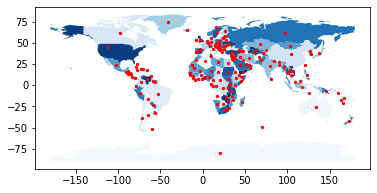

In [7]:
import geopandas as gpd
import pandas as pd

# Access built-in Natural Earth data via GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get a list (dataframe) of country centroids
centroids = world.centroid
centroid_list = pd.concat([world.name, centroids], axis=1)

# Plot the results
base = world.plot(column = 'name', cmap = 'Blues')
centroids.plot(ax = base, marker = 'o', color = 'red', markersize = 5)

### streamlit

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [36]:
map_data = pd.DataFrame(
    np.random.randn(1000, 2) / [50, 50] + [37.76, -122.4],
    columns=['lat', 'lon'])
map_data

,lat,lon
0,37.784920,-122.387203
1,37.755690,-122.351590
2,37.750931,-122.427672
3,37.754889,-122.424706
4,37.782231,-122.392955
...,...,...
995,37.799878,-122.391094
996,37.760707,-122.397868
997,37.759390,-122.405961
998,37.745202,-122.417462


In [44]:
cents = pd.read_csv('country_centroids.csv',delimiter=';')
cents = cents.dropna()



In [90]:
cents_eur = pd.read_csv('cents_eur.csv',delimiter=';')


,A,lat,lon,B
0,AD,42.546.245,1.601.554,Andorra
1,AL,41.153.332,20.168.331,Albania
2,AT,47.516.231,14.550.072,Austria
3,BA,43.915.886,17.679.076,Bosnia and Herzegovina
4,BE,50.503.887,4.469.936,Belgium
5,BY,53.709.807,27.953.389,Belarus
6,CH,46.818.188,8.227.512,Switzerland
7,DE,51.165.691,10.451.526,Germany
8,DK,5.626.392,9.501.785,Denmark
9,EE,58.595.272,25.013.607,Estonia


In [58]:
def remove_dots(x):
    return int(str(x).replace(".", ""))

In [83]:
def trunc(x):
    
    list_ =  ['.'.join( str(x).split('.')[0:2]),str(x).split('.')[2]]  
    merged = ''.join(list_)
   
    return merged



In [91]:
#cents_eur['lat'] = cents_eur['lat'].apply(trunc)
#cents_eur['lon'] = cents_eur['lon'].apply(trunc)

In [92]:
cents_eur

,A,lat,lon,B
0,AD,42.546245,1.601554,Andorra
1,AL,41.153332,20.168331,Albania
2,AT,47.516231,14.550072,Austria
3,BA,43.915886,17.679076,Bosnia and Herzegovina
4,BE,50.503887,4.469936,Belgium
5,BY,53.709807,27.953389,Belarus
6,CH,46.818188,8.227512,Switzerland
7,DE,51.165691,10.451526,Germany
8,DK,5.626392,9.501785,Denmark
9,EE,58.595272,25.013607,Estonia


In [93]:
cents_eur.to_csv('cents_eur_trunc.csv')

In [34]:
cents = pd.read_csv('cents_trunc.csv')
#cents = cents[['latitude','longitude']]
cents

,Unnamed: 0,lat,lon
0,0,42,1
1,1,23,53
2,2,3,67
3,3,17,-61
4,4,18,-63
...,...,...,...
237,237,42,20
238,238,15,48
239,239,-128,45
240,240,-30,22


In [32]:
cents = cents.rename(columns={"latitude": "lat", "longitude": "lon"}, errors="raise")

In [2]:
from geopy import geocoders
from geopy.geocoders import Nominatim

def city_lat_long(city):
    geolocator = Nominatim(user_agent='myapplication')
    location = geolocator.geocode(city)
    latitude = location[1][0]
    longitude = location[1][1]
    return latitude, longitude
def country_lat_long(country):
    geolocator = Nominatim(user_agent='myapplication')
    location = geolocator.geocode(country)
    latitude = location[1][0]
    longitude = location[1][1]
    return latitude, longitude

In [34]:
country_lat_long('Paris')

(48.8566969, 2.3514616)

## Database retrieve

In [20]:
import requests
query = 'energy'
url = 'http://127.0.0.1:8000/query'
params = {
    'query':query,
    'index': 'eurlex',
    'n': 20
}     

response = requests.get(url,params=params).json()

In [21]:
print(response)

{'0': {'title': 'Energy: women as equal players in the 21st century', 'author': 'European Economic and Social Committee', 'date': '23/07/2020', 'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=PI_EESC:EESC-2020-01515-AS'}, '1': {'title': 'Offshore Renewable Energy Strategy', 'author': 'European Economic and Social Committee', 'date': '14/04/2021', 'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=PI_EESC:EESC-2020-05038-AS'}, '2': {'title': 'State of the Energy Union Report 2020 and Assessment of National Energy and Climate Plans', 'author': 'European Economic and Social Committee', 'date': '09/03/2021', 'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=PI_EESC:EESC-2020-04915-AS'}, '3': {'title': 'EU Strategy for Energy System Integration', 'author': 'European Economic and Social Committee', 'date': '16/12/2020', 'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=PI_EESC:EESC-2020-03534-AS'}, '4': {'title': 'COMMISSION STAFF WORKING DOCUMENT Clean E